In [1]:
import mysql.connector as sql
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

db_connection = sql.connect(host='', database='', user='', password='')
db_cursor = db_connection.cursor()

query = 'SELECT * FROM all_physical'
db_cursor.execute(query)
table_rows = db_cursor.fetchall()
df = pd.DataFrame(table_rows)
data = pd.read_sql(query, db_connection)

In [2]:
for i in range(0, len(data)):
    data.iloc[i]['Timestamp'] = dt.datetime.strptime(data.iloc[i]['Timestamp'],' %d/%m/%Y %I:%M:%S %p')
    data.iloc[i]['Timestamp'] = data.iloc[i]['Timestamp'].strftime('%Y-%m-%d %H:%M:%S')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.sort('Timestamp')

/Users/yingwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [4]:
# Plot all features for 10 mins before and after missing timestamps to see if there is any discontinuous trend.
# The missing timestamps starts at index 298836, and we did not observe any obvious discontinuity in the graphs below. 
data.ix[:, 'FIT101':'P603'] = data.ix[:, 'FIT101':'P603'].astype(float)
features = list(data.ix[:,'FIT101':'P603'])

In [16]:
print(data[data['Timestamp'] == '2015-12-31 20:50:36'].index)
print(data[data['Timestamp'] == '2015-12-31 21:11:58'].index)

Int64Index([298236], dtype='int64')
Int64Index([299437], dtype='int64')


In [19]:
print(data[data['Timestamp'] == '2015-12-31 21:00:36'].index)

Int64Index([298836], dtype='int64')


In [17]:
new_data = data.ix[298236:299437,:]

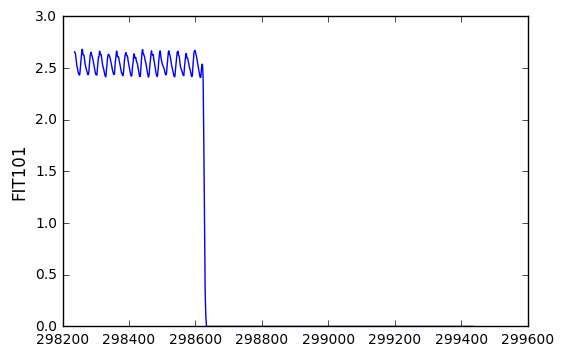

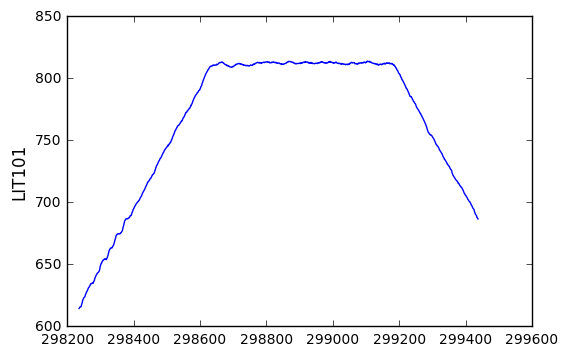

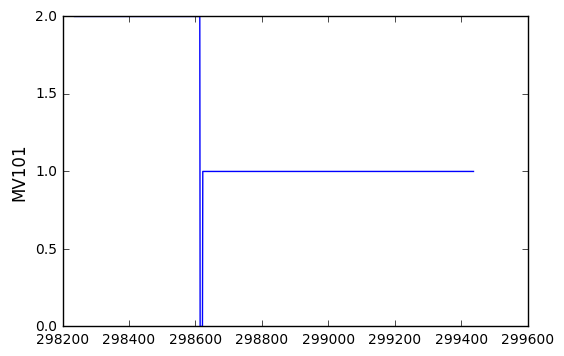

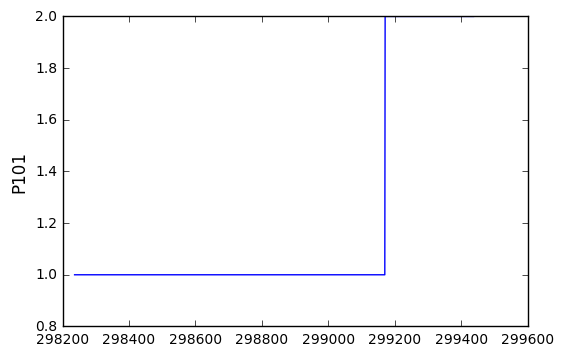

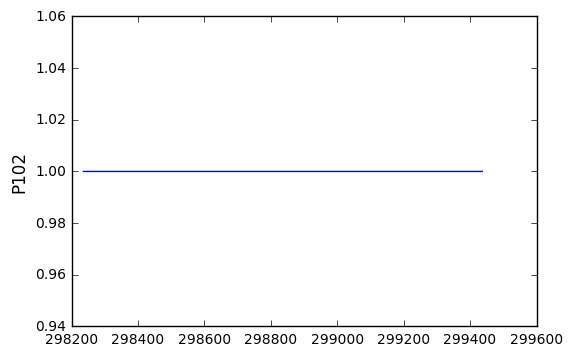

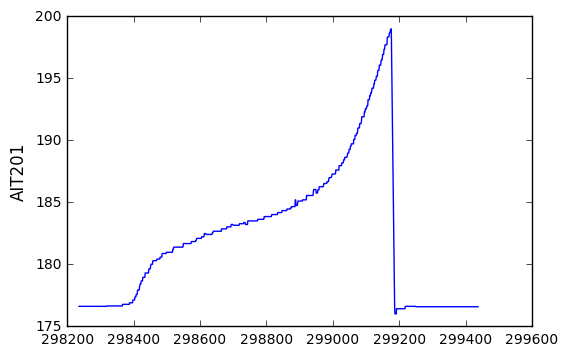

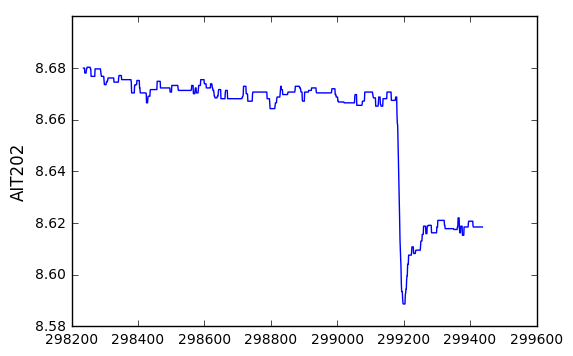

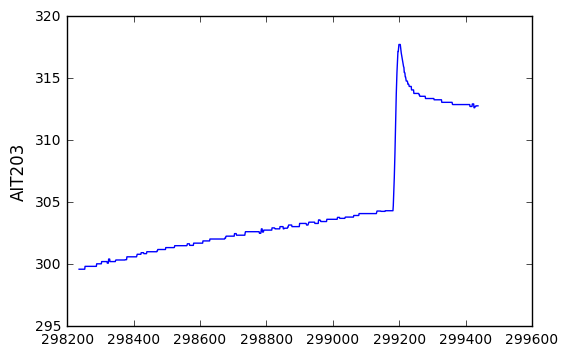

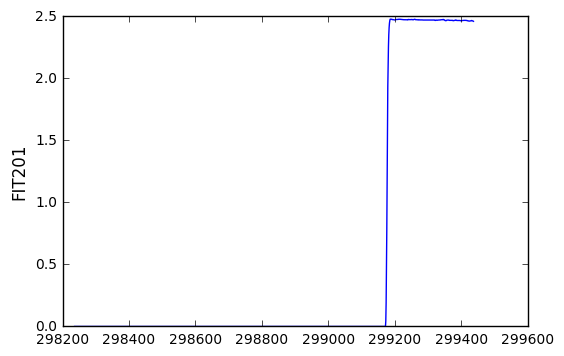

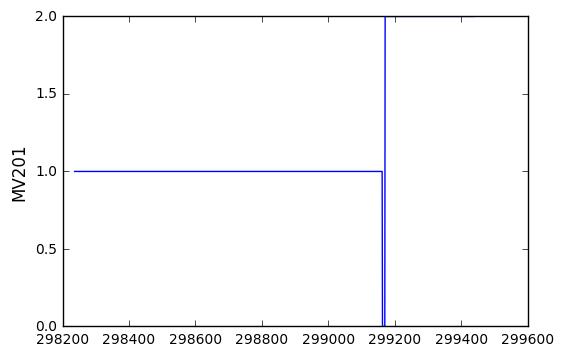

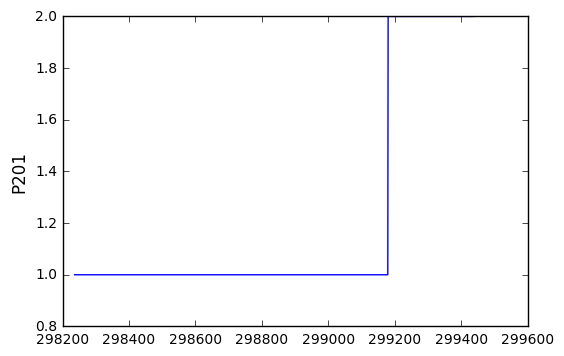

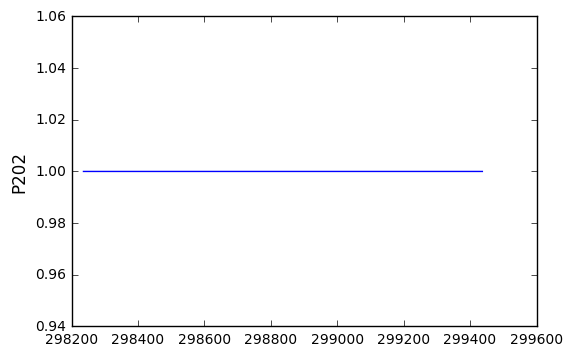

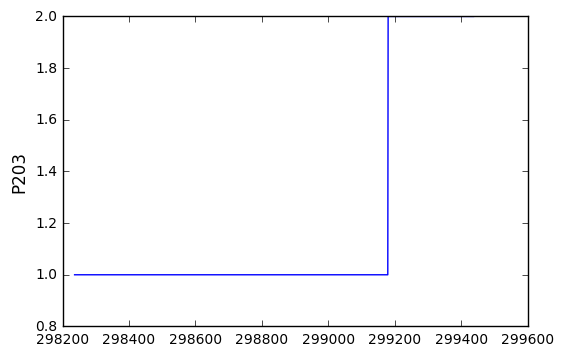

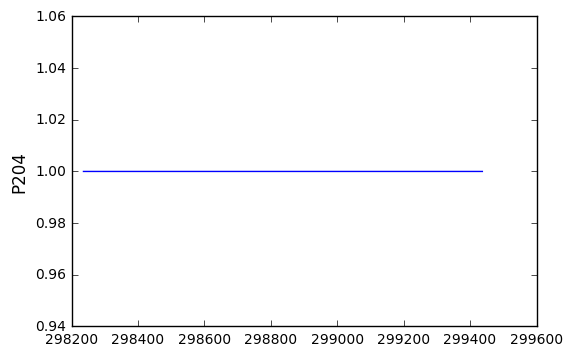

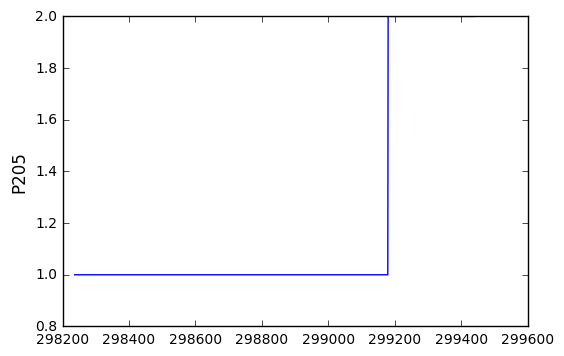

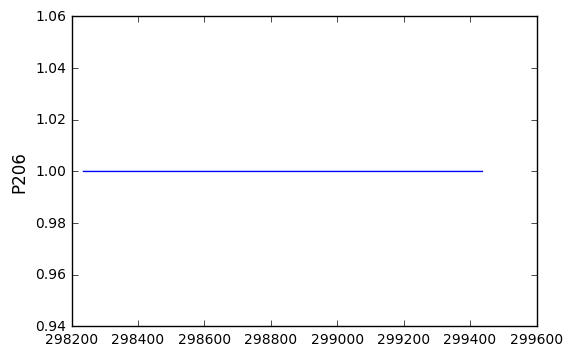

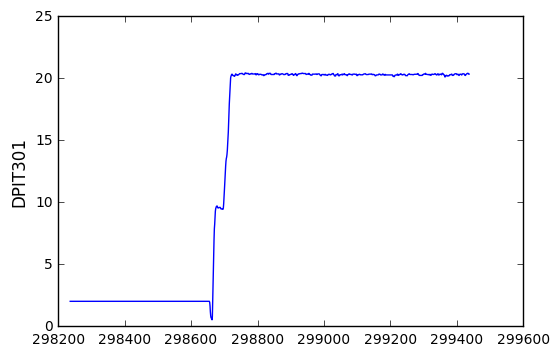

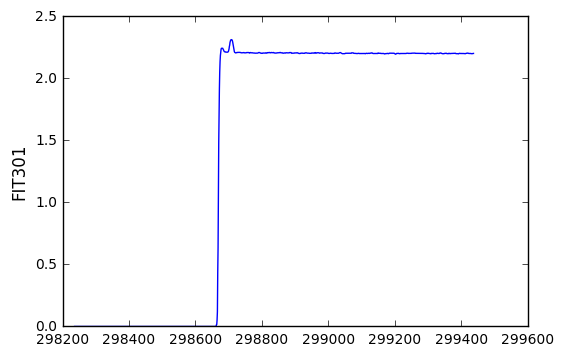

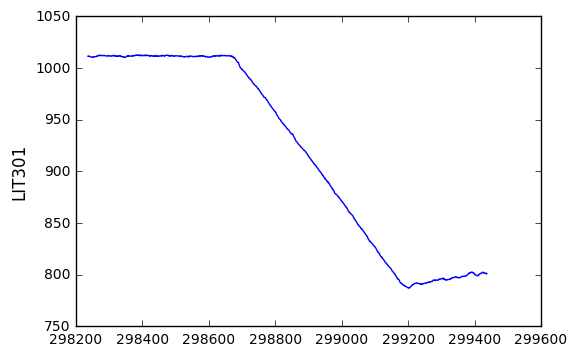

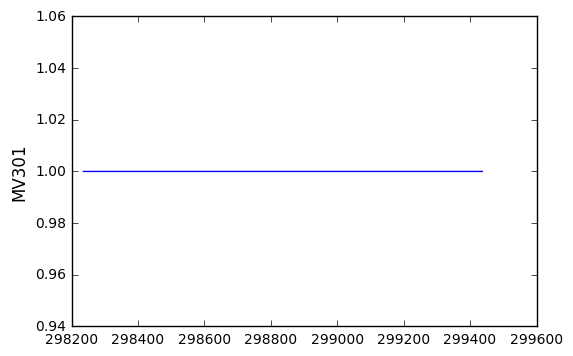

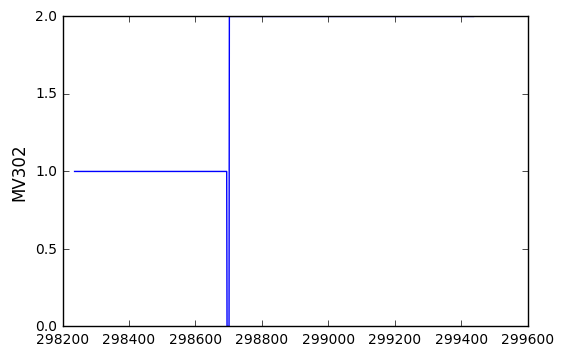

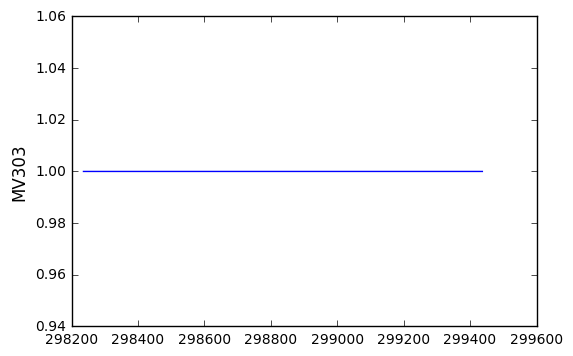

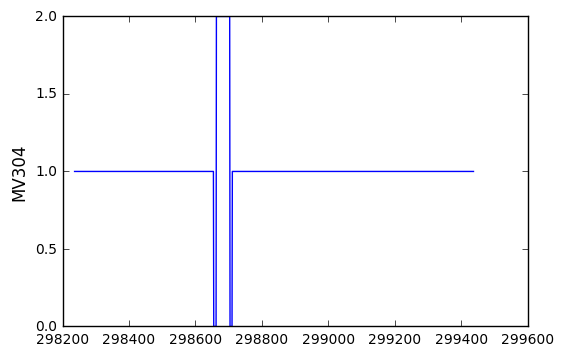

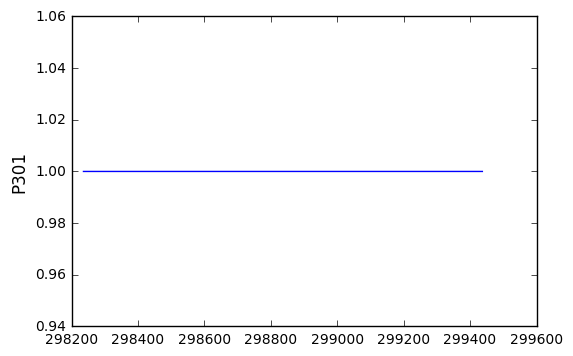

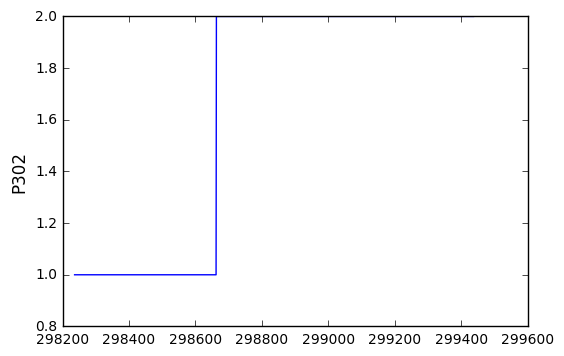

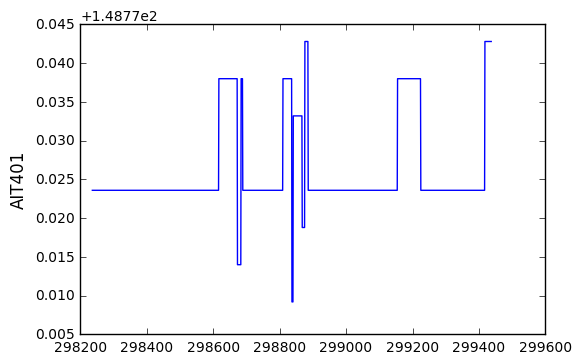

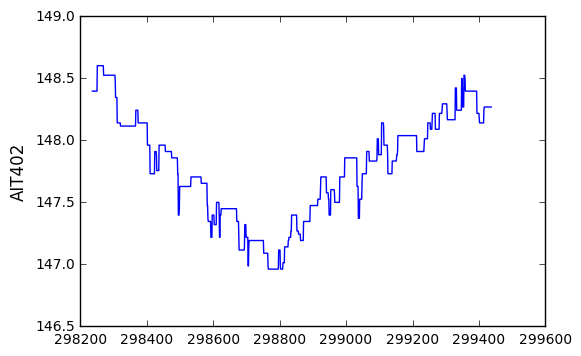

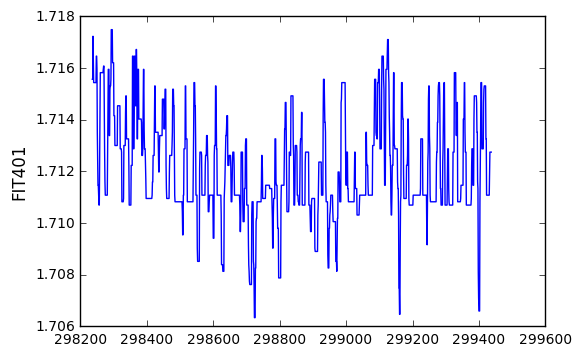

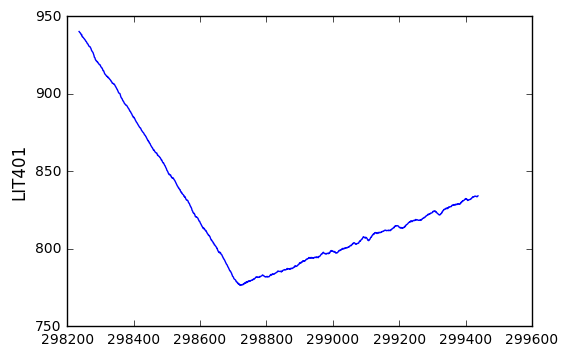

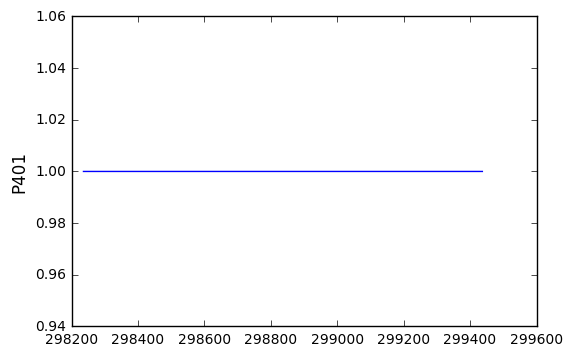

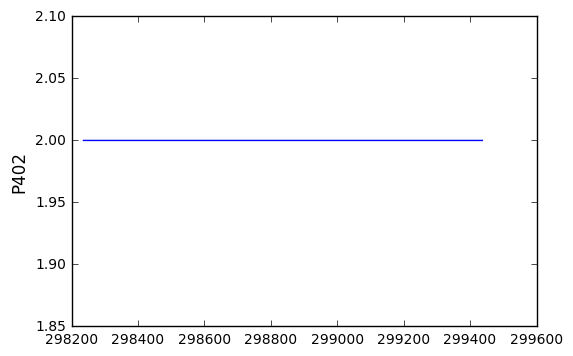

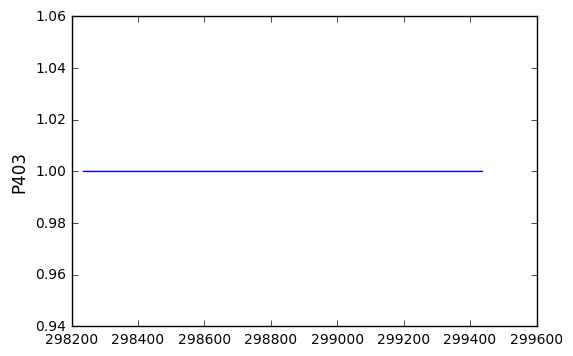

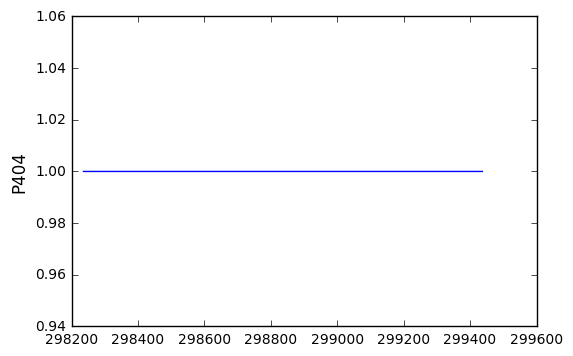

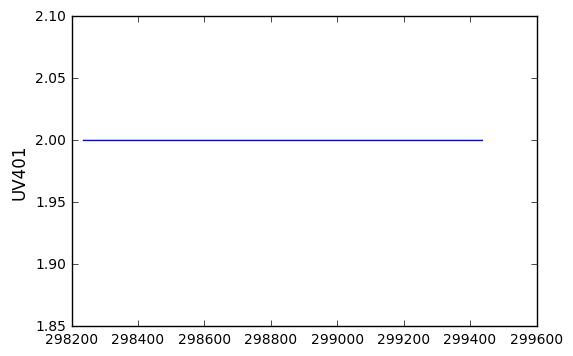

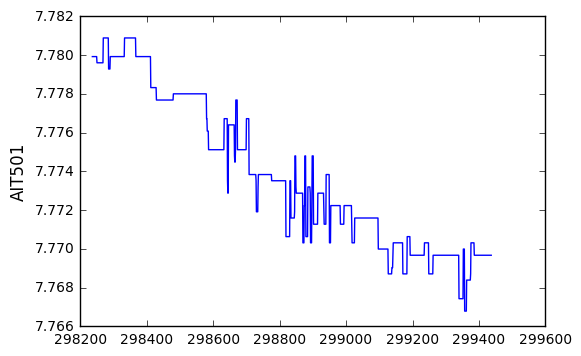

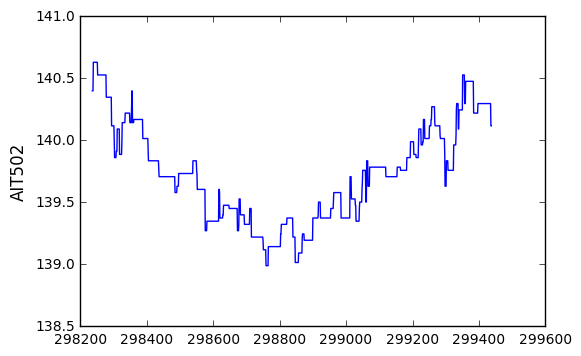

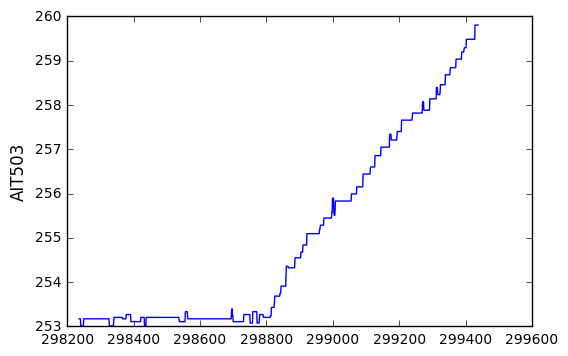

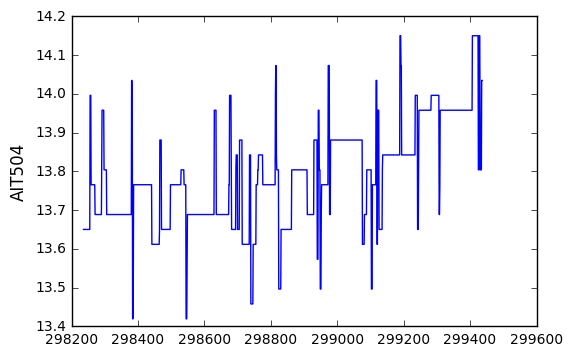

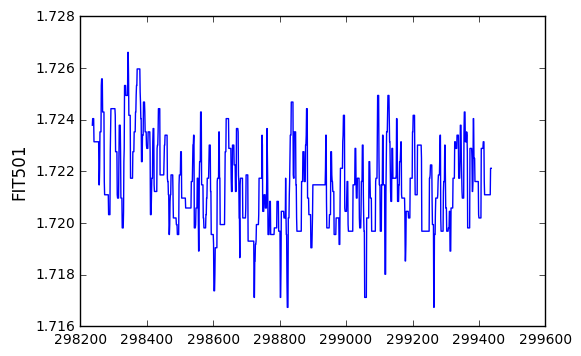

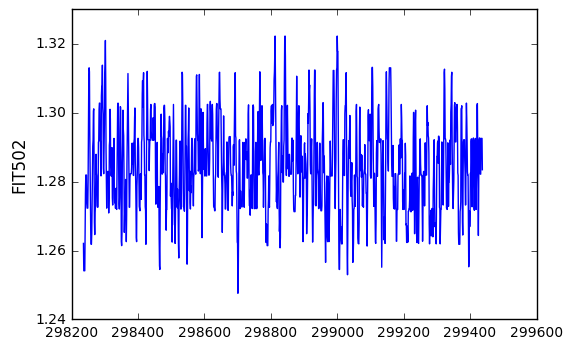

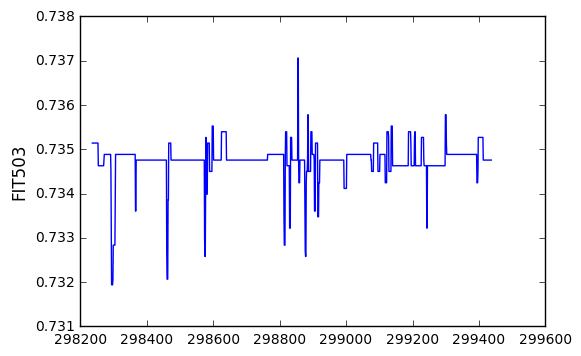

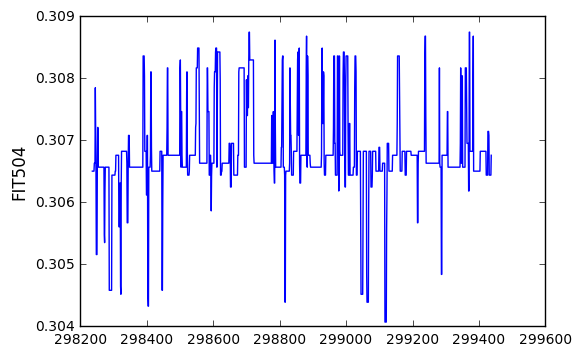

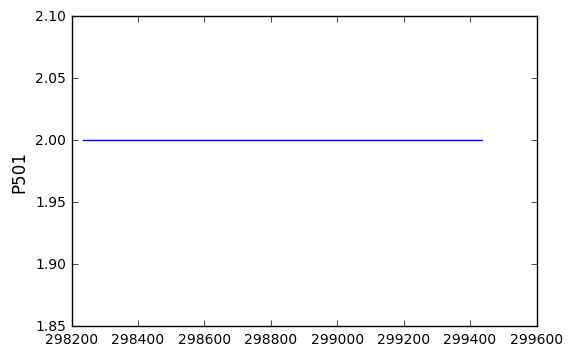

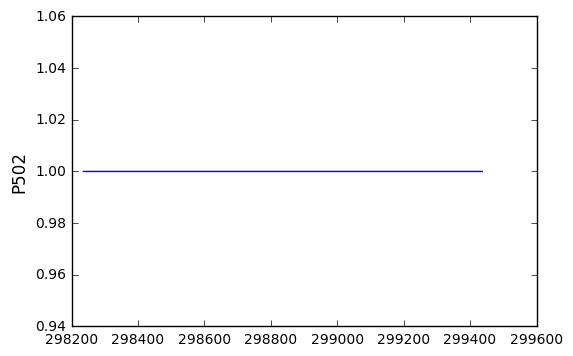

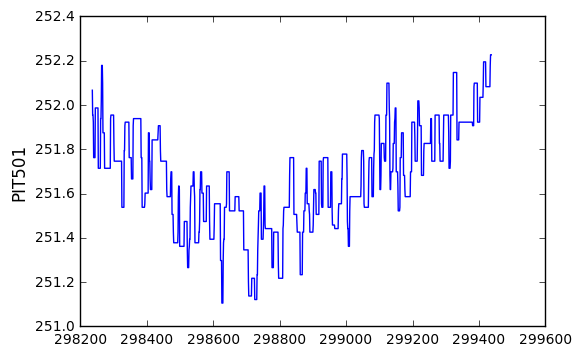

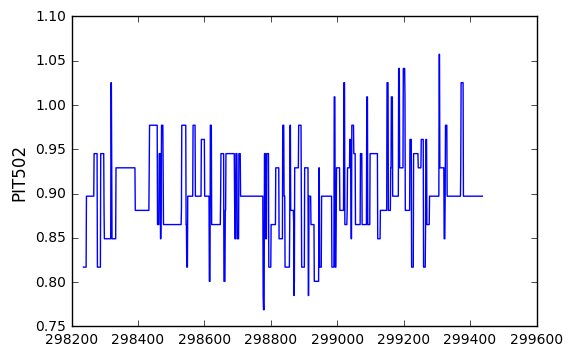

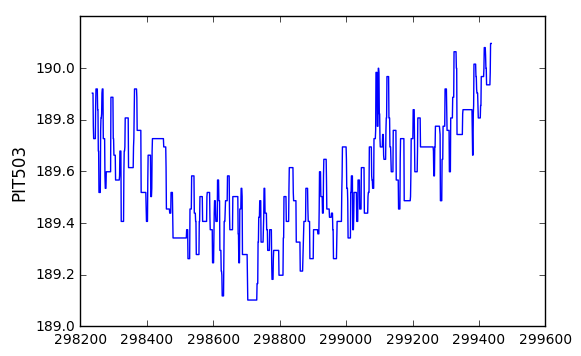

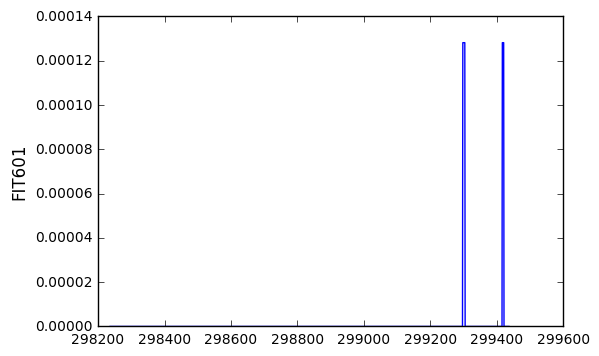

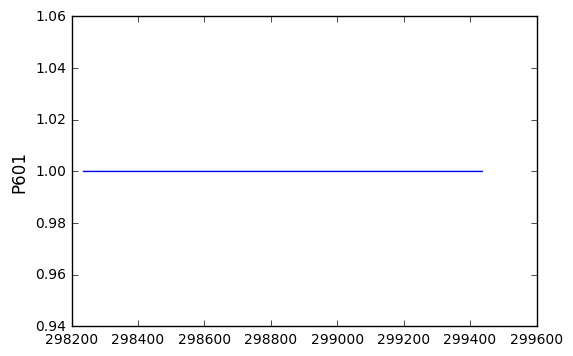

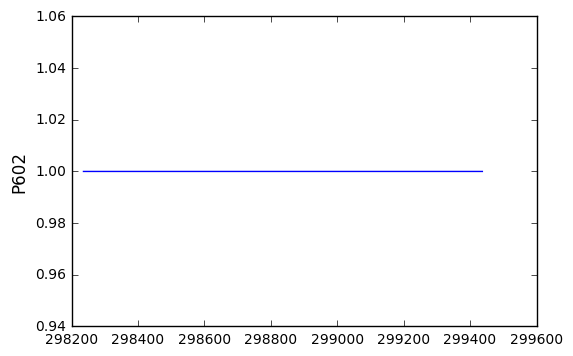

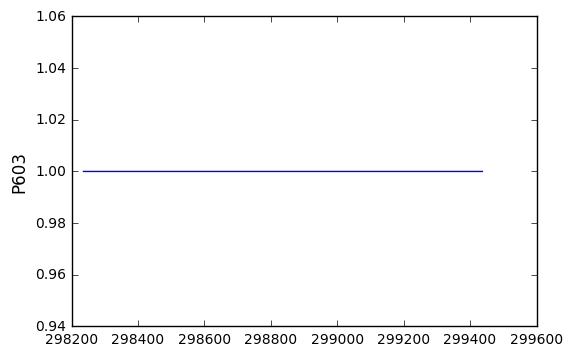

In [18]:
# Line charts for all features to observe trend before and after missing timestamps
plt.figure(figsize=(6,4))
for i in features:
    plt.plot(new_data[i])
    plt.ylabel(i, fontsize=12)
    plt.show()